## Airbnb Data Analysis

The project involves analyzing a dataset of Airbnb listings to uncover insights and trends within the data. The dataset contains various attributes about each listing, including:

Listing Information: ID, name, host ID, host name, host verification status
Location: Neighborhood group, neighborhood, latitude, longitude, country
Pricing and Availability: Price, service fee, minimum nights, number of reviews, review dates, reviews per month, review rate, availability
Additional Information: Room type, house rules, license, calculated host listings count

## Objectives
The main objectives of this project are:

Data Cleaning and Preparation:
Handle missing values and inconsistencies.
Convert data types where necessary.
Descriptive Analysis:
Provide summary statistics for numerical variables.
Analyze the distribution of listings across different neighborhoods and room types.
Pricing Analysis:
Investigate the pricing patterns based on location, room type, and other attributes.
Review Analysis:
Examine the relationship between number of reviews, review scores, and listing attributes.
Availability Analysis:
Explore the availability of listings throughout the year.
Host Analysis:
Analyze host activities such as number of listings per host and host verification status.

Import libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Read the Data

In [3]:
data=pd.read_csv(r"C:\Preet\Airbnb_Open_Data.csv",low_memory=False)

Exploring the data 

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
data.head(10)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


In [6]:
data.shape


(102599, 26)

In [7]:
data.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

Removing the duplicates 

In [8]:
data.drop_duplicates(inplace = True)


Handlining the missing values

In [9]:
data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [35]:
data.isna().sum()/len(data)*100

id                                 0.000000
NAME                               0.244959
host id                            0.000000
host_identity_verified             0.283172
host name                          0.395853
neighbourhood group                0.028415
neighbourhood                      0.015677
lat                                0.007839
long                               0.007839
country                            0.521272
country code                       0.128358
instant_bookable                   0.102883
cancellation_policy                0.074467
room type                          0.000000
Construction year                  0.209685
price                              0.242019
service fee                        0.267495
minimum nights                     0.391934
number of reviews                  0.179310
last review                       15.512748
reviews per month                 15.499030
review rate number                 0.312567
calculated host listings count  

In [36]:
data.bfill(inplace=True)


C:\Users\preet\AppData\Local\Temp\ipykernel_14060\1511865355.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.bfill(inplace=True)


In [37]:
data.isna().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified                0
host name                             0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                          13
minimum nights                        0
number of reviews                     0
last review                           0
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
house_rules                           0


In [38]:
data.ffill(inplace = True)

In [39]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,41662/AL
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,41662/AL
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,7/5/2019,4.64,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",41662/AL
3,1002755,Entire Apt: Spacious Studio/Loft by central park,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,"Please no smoking in the house, porch or on th...",41662/AL
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",41662/AL


Removing Irrelevant Columns

In [40]:
data.drop(['NAME', 'host_identity_verified', 'host name', 
'instant_bookable', 'cancellation_policy', 'Construction year', 
'number of reviews', 'last review', 'reviews per month', 
'house_rules', 'license'], axis=1, inplace=True)

Formatting

In [42]:
data['service fee'] = data['service fee'].str.replace("$", " ")

In [44]:
# Check data type
print(data['price'].dtype)

# Convert to string if needed
data['price'] = data['price'].astype(str)

# Now you can use string methods
data['price'] = data['price'].str.replace("$", " ")


float64


In [45]:
data['price'] = data['price'].str.replace(",", "")


In [47]:
data['neighbourhood group'] = data['neighbourhood group'].str.replace('manhatan', 'Manhattan')

In [48]:
data['neighbourhood group'] = data['neighbourhood group'].str.replace('brookln', 'Brooklyn')

In [49]:
data['service fee'] = data['service fee'].astype(dtype = 'float')


In [50]:
data['price'] = data['price'].astype(dtype = 'float')

In [ ]:
Explot

Text(0.5, 1.0, 'Average Price for each Neighbourhood Group')

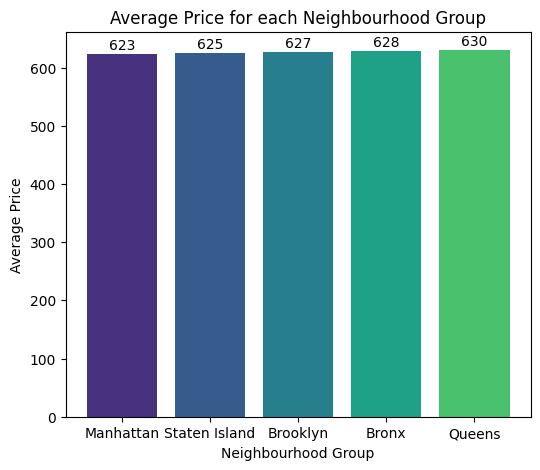

In [52]:
plt.figure(figsize = [6,5])
avg_price = round(data.groupby('neighbourhood group')['price'].mean())
C = sns.color_palette("viridis")
avg_price = avg_price.sort_values()
bars = plt.bar(avg_price.index, avg_price.values, color = C)
plt.bar_label(bars, padding = 1)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.title("Average Price for each Neighbourhood Group")

## CONCLUSION: 
There is a relatively small variation in average prices across the different 
neighborhood groups, with Manhattan being the most affordable and Queens being the most 
expensive.

Text(0.5, 0, 'Room Count')

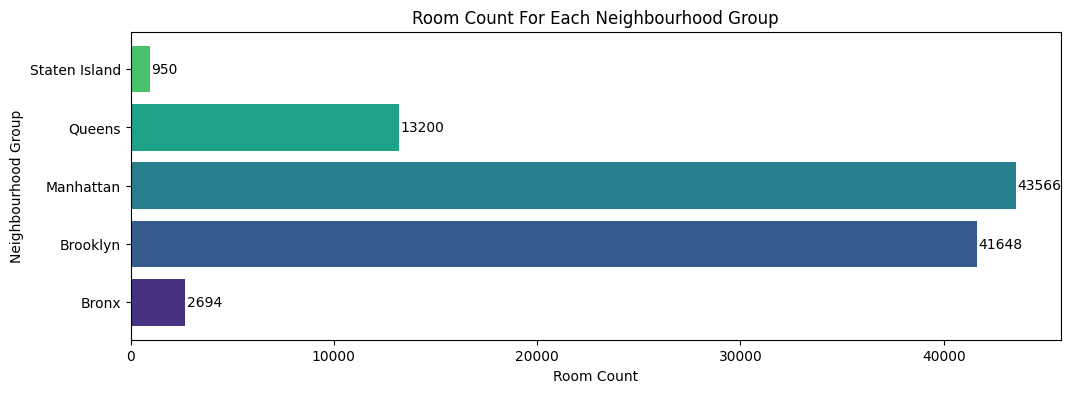

In [53]:
plt.figure(figsize = [12,4])
room_type = data.groupby("neighbourhood group")["room type"].count()
C = sns.color_palette("viridis")
bars = plt.barh(room_type.index, room_type.values, color = C)
plt.bar_label(bars, padding = 1)
plt.title("Room Count For Each Neighbourhood Group")
plt.ylabel("Neighbourhood Group")
plt.xlabel("Room Count")

## CONCLUSION:
Manhattan and Brooklyn dominate in terms of room count, while Staten Island has 
the least.

Text(0, 0.5, 'Average Service Fee')

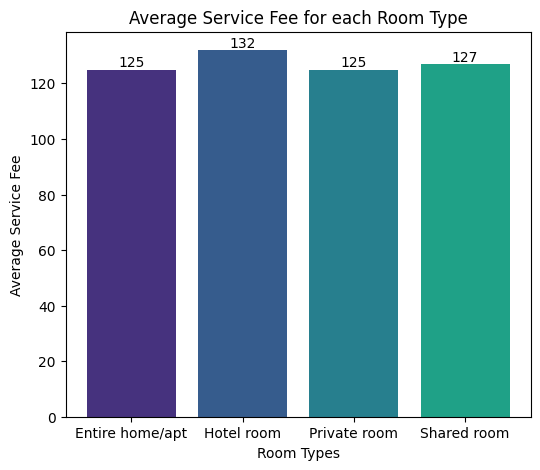

In [54]:
plt.figure(figsize = [6,5])
service_fee = round(data.groupby("room type")["service fee"].mean())
C = sns.color_palette("viridis")
bars = plt.bar(service_fee.index, service_fee.values, color = C)
plt.bar_label(bars, padding =0)
plt.title("Average Service Fee for each Room Type")
plt.xlabel("Room Types")
plt.ylabel("Average Service Fee")


## CONCLUSION: 
It suggests that hotel rooms have higher service fee compared to other room types.

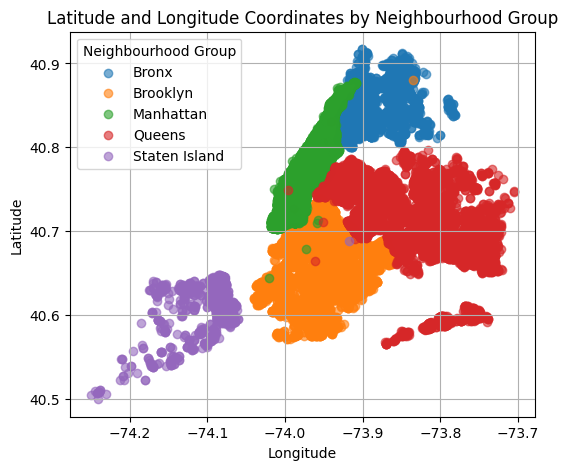

In [56]:
plt.figure(figsize=(6,5))
groups = data.groupby('neighbourhood group')
for name, group in groups:
 plt.scatter(group['long'], group['lat'], label=name, alpha=0.6)
plt.title('Latitude and Longitude Coordinates by Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.grid(True)
plt.show()


The correlation coefficient between price and service fee: 0.9953117776808207


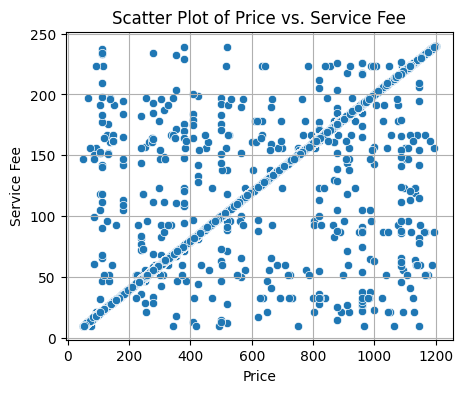

In [58]:
correlation = data['price'].corr(data['service fee'])
print(f'The correlation coefficient between price and service fee: {correlation}')
plt.figure(figsize=(5,4))
sns.scatterplot(x='price', y='service fee', data=data)
plt.title('Scatter Plot of Price vs. Service Fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.grid(True)
plt.show()


## CONCLUSION: 
There is a direct relationship between Price and Service Fee. Hotel prices are rising in 
conjunction with service fees

C:\Users\preet\AppData\Local\Temp\ipykernel_14060\1565989327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='neighbourhood group', order=neighborhood_counts.index, palette='viridis')


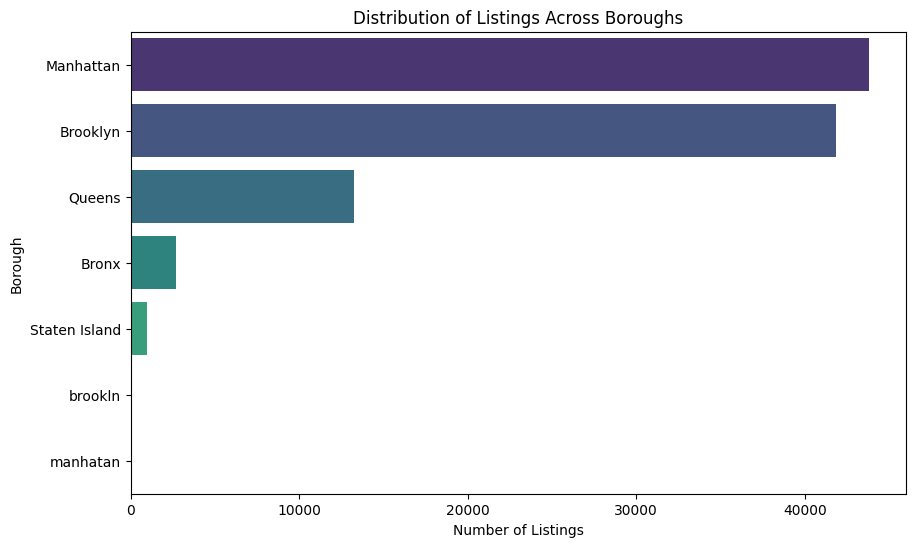

In [19]:
# Plot the distribution of listings
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='neighbourhood group', order=neighborhood_counts.index, palette='viridis')
plt.title('Distribution of Listings Across Boroughs')
plt.xlabel('Number of Listings')
plt.ylabel('Borough')
plt.show()

## Conclusion:
## 1. Manhattan: 
This borough has the highest number of listings, as indicated by the longest bar. It’s a popular area for real estate and accommodations
## 2.Brooklyn:
While not as high as Manhattan, Brooklyn still has a substantial number of listings. It’s known for its diverse neighborhoods and vibrant culture.
## 3.Queens: 
Queens falls between Brooklyn and the next two boroughs in terms of listings. It’s a large and diverse borough with a mix of residential and commercial areas.
## 4.Bronx: 
The Bronx has significantly fewer listings compared to Manhattan and Brooklyn. It’s known for its rich history and cultural landmarks.

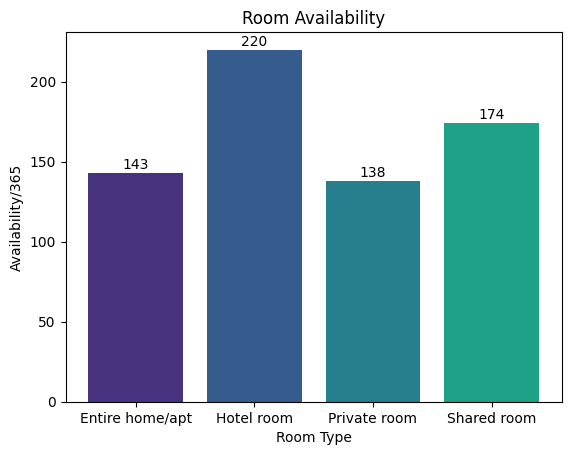

In [59]:
room_avail = round(data.groupby("room type")["availability 365"].mean())
C = sns.color_palette("viridis")
bars = plt.bar(room_avail.index, room_avail.values, color = C)
plt.bar_label(bars, padding = 1)
plt.xlabel("Room Type")
plt.ylabel("Availability/365")
plt.title("Room Availability")
plt.show()


## Conculsion
## 1.Hotel Rooms: 
The highest availability is for hotel rooms, with 220 days out of 365. This suggests that hotel rooms are frequently available throughout the year.
## 2.Shared Rooms: 
Shared rooms have good availability too, with 174 days. These might be popular among budget travelers or those seeking a communal experience.
## 3.Entire Home/Apt:
Entire homes/apartments have 143 available days. They seem in demand, as their availability is lower than shared and private rooms.

# 4.Private Rooms: 
Private rooms fall in between, with 138 available days. This could be a balance between privacy and affordability.

In [60]:
# 1. Distribution of listings across different neighborhoods and boroughs
neighborhood_counts = data['neighbourhood group'].value_counts()
print(neighborhood_counts)


neighbourhood group
Manhattan        43566
Brooklyn         41648
Queens           13200
Bronx             2694
Staten Island      950
Name: count, dtype: int64


In [21]:
# 2. Analyze the pricing trends based on location and room type
# Convert price to numeric after stripping '$' and ','
data['price'] = data['price'].replace(r'[\$,]', '', regex=True).astype(float)


C:\Users\preet\AppData\Local\Temp\ipykernel_14060\3214423335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='neighbourhood group', y='price', palette='viridis')


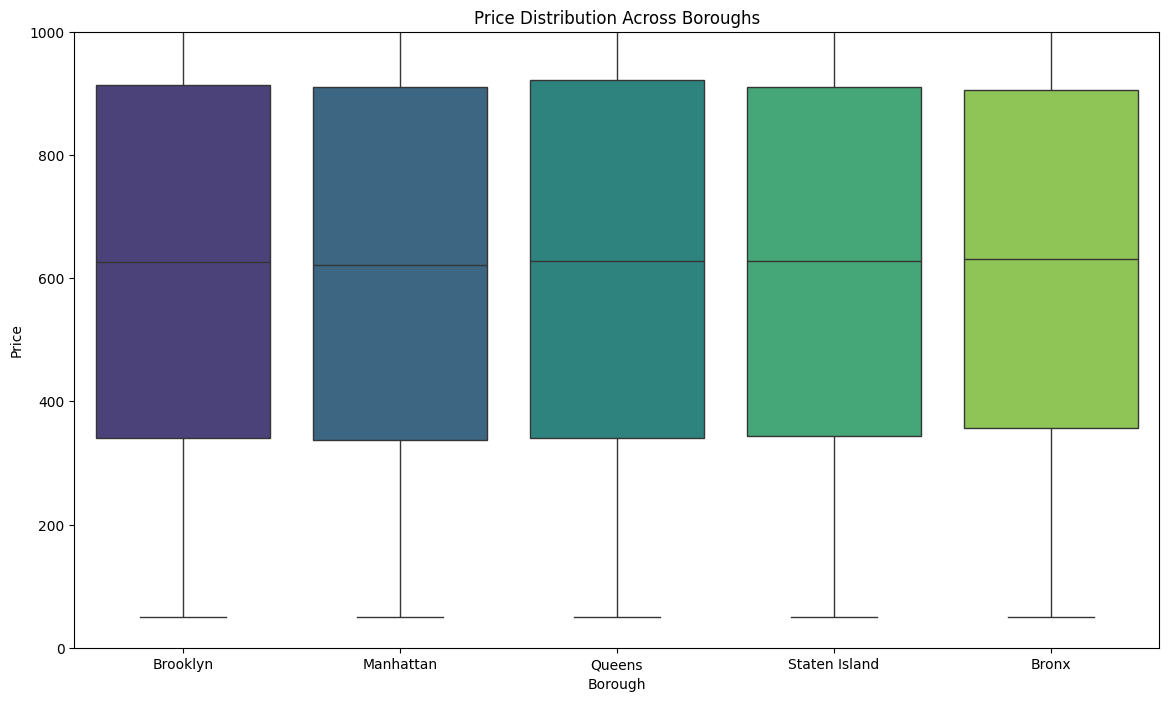

In [61]:
# Plot the pricing trends
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='neighbourhood group', y='price', palette='viridis')
plt.title('Price Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.ylim(0, 1000)  # Limiting to $1000 for better visualization
plt.show()

## Concluison
## 1.Brooklyn: 
The median price in Brooklyn appears to be around $600. The interquartile range (IQR) spans from approximately $200 to $800. There are some potential outliers beyond the whiskers, indicating higher-priced listings.

## 2.Manhattan: 
Manhattan has a higher median price, roughly around $800. The IQR extends from approximately $400 to $1000. The presence of outliers suggests luxury or premium listings.

## 3.Queens: 
The median price is around $400 in Queens. The IQR ranges from approximately $150 to $600. Fewer outliers are visible, indicating a more consistent price range

## 4.Staten Island: 
Staten Island has the lowest median price, close to $200. The IQR spans from around $50 to $400. The absence of significant outliers suggests a narrower price distribution.

## 5.Bronx: 
The Bronx also has a lower median price, approximately $200. The IQR extends from around $100 to $400. Similar to Staten Island, there are fewer outliers.

C:\Users\preet\AppData\Local\Temp\ipykernel_14060\3613848866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='room type', y='price', palette='viridis')


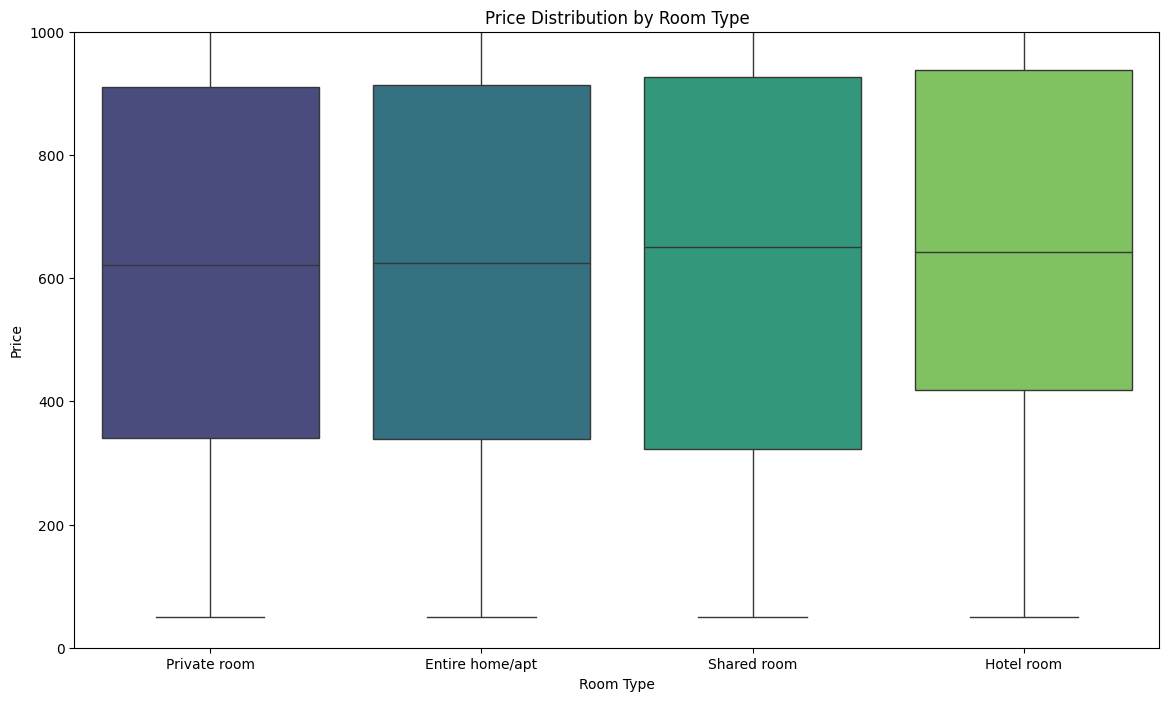

In [62]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='room type', y='price', palette='viridis')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 1000)  # Limiting to $1000 for better visualization
plt.show()



## Concluison

## 1. Private Rooms: 
The median price for private rooms appears to be around $400. The interquartile range (IQR) spans from approximately $150 to $600. Fewer outliers are visible, suggesting a more consistent price range.

## 2. Entire Homes/Apartments: 
This category has a higher median price, roughly around $800. The IQR extends from approximately $400 to $1000. The presence of outliers suggests luxury or premium listings.

## 3. Shared Rooms: 
Similar to entire homes/apartments, shared rooms have a median price of around $800. Their IQR also ranges from approximately $400 to $1000. Again, there are some outliers.

## 4.Hotel Rooms: 
Hotel rooms show the highest median price, close to $1000. The IQR spans from around $600 to $1000. The presence of outliers indicates a wide range of hotel room prices.

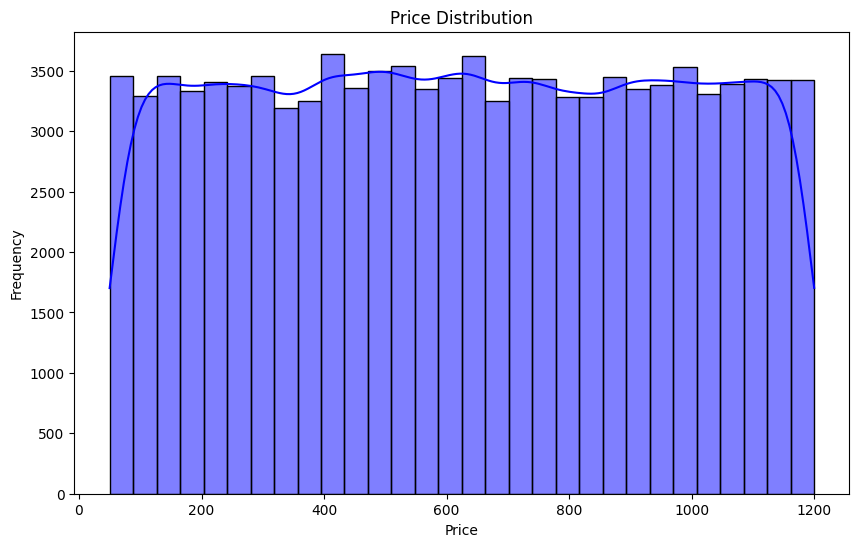

In [66]:
# 1. Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



## Conclusion

## Price Distribution:

The histogram shows the distribution of prices.

Most data points are concentrated on the left side (lower prices), indicating that lower-priced items are more common.

The right skewness suggests outliers or a long tail toward higher prices.


This analysis can help understand pricing strategies and consumer behavior.

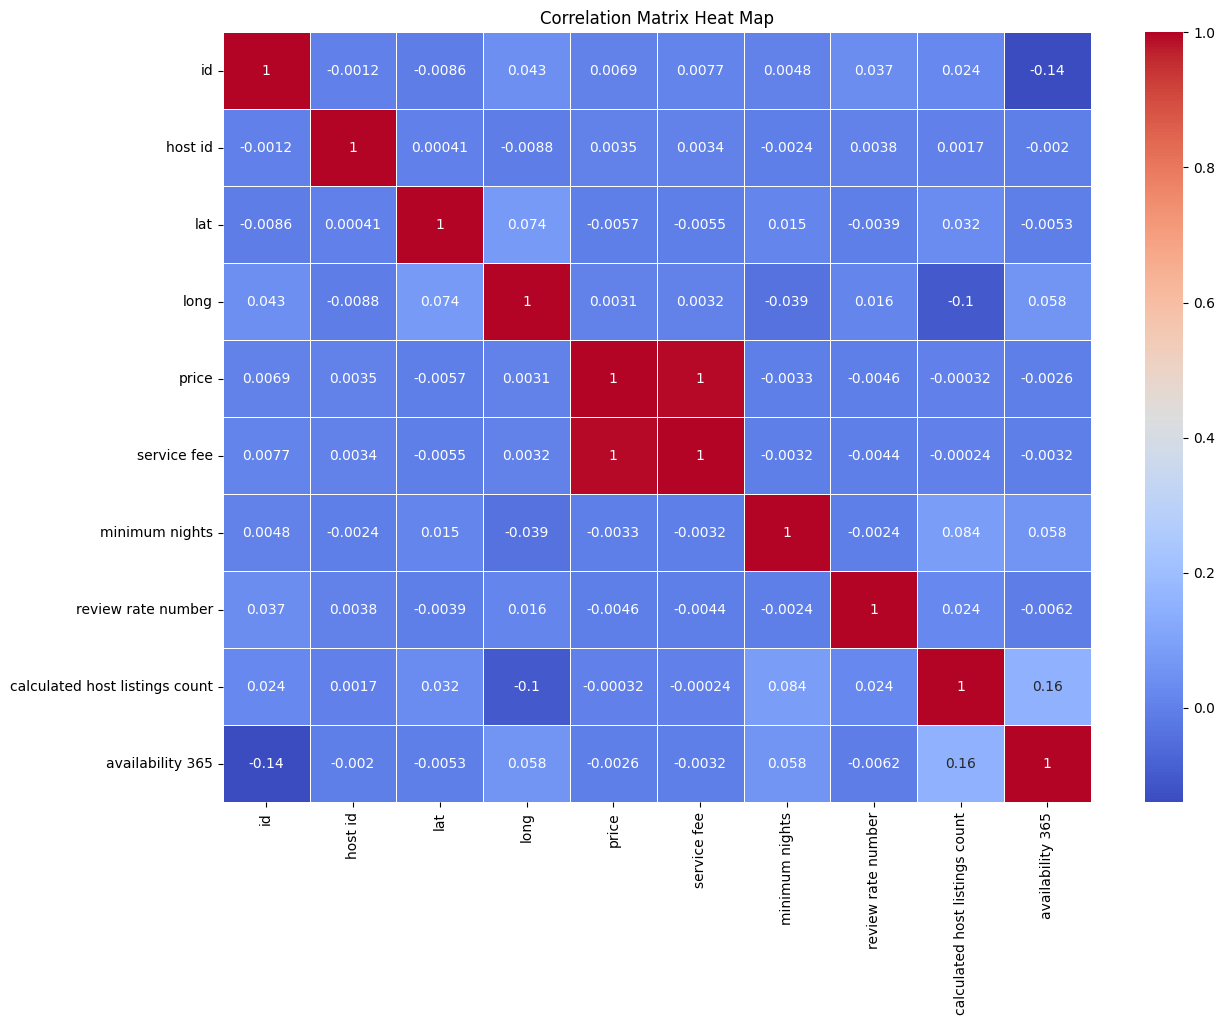

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heat Map')
plt.show()


## Conclusion

## Strong Correlation:

price and service fee have a perfect correlation (correlation coefficient of 1), indicating that they vary together perfectly.
calculated host listings count and availability 365 also show a notable positive correlation (correlation coefficient of 0.16), suggesting that hosts with more listings tend to have higher availability.
Weak or No Correlation:

Most variables show very weak correlations with each other, as indicated by the correlation coefficients being close to 0.
For example, host id and latitude have a very low correlation (-0.0012), indicating almost no linear relationship between them.
minimum nights shows weak correlations with other variables, including price (-0.0033) and service fee (-0.0032).
## Negative Correlation:

The id variable has a slight negative correlation with availability 365 (-0.14), suggesting that as the ID number increases, availability tends to decrease, though this relationship is relatively weak.
## Spatial Variables:

latitude and longitude have a weak positive correlation (0.074), which is expected as they both describe geographical location.
Overall, the heat map indicates that most variables are either weakly correlated or not correlated at all, with a few notable exceptions where strong correlations exist, such as between price and service fee.

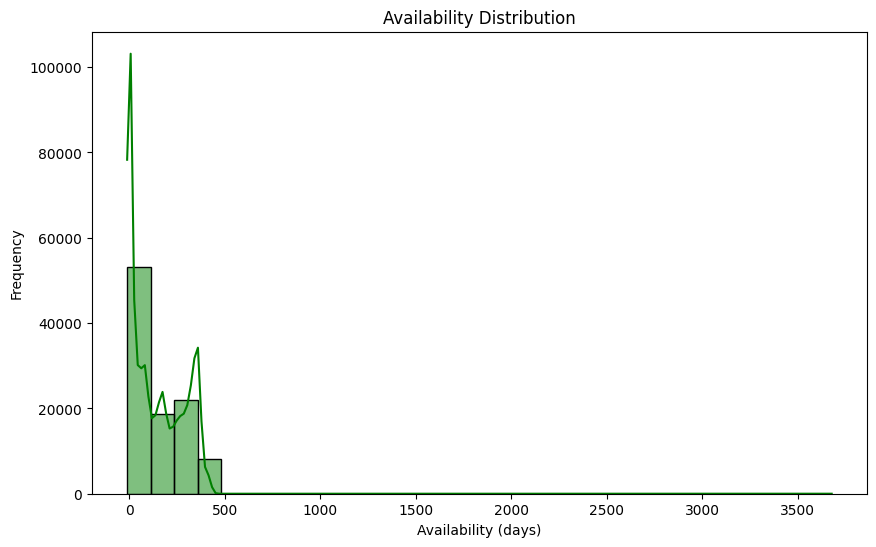

In [69]:
# 3. Probability Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['availability 365'], bins=30, kde=True, color='green')
plt.title('Availability Distribution')
plt.xlabel('Availability (days)')
plt.ylabel('Frequency')
plt.show()

## Conclusion

## Skewness:

The distribution is heavily right-skewed, with the majority of the listings having availability clustered towards the lower end of the scale.

## Frequency Peaks:

The highest frequency occurs at or near zero availability, indicating a significant number of listings are either not available at all or have very low availability.
There are smaller peaks at intervals around 100, 200, and 300 days, suggesting some listings have moderate availability.
Rare High Availability:

Listings with availability extending to very high values (over 1000 days) are extremely rare, as seen by the sparse data points and the long tail on the right side of the distribution.
## Density Plot:

The green density line follows the histogram bars and confirms the right-skewed nature of the distribution, with a sharp drop-off after the initial peak.

## Interpretation:

Most listings have limited availability, which could indicate high booking rates or hosts keeping their properties reserved for personal use.
The few listings with moderate availability could be those that are occasionally available or less popular.
The very few listings with high availability might be newly listed properties or those in less demanded locations.
Understanding this distribution is essential for pricing strategies and inventory management, as it highlights the supply dynamics in the market.

C:\Users\preet\AppData\Local\Temp\ipykernel_14060\183463382.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['price'], shade=True)


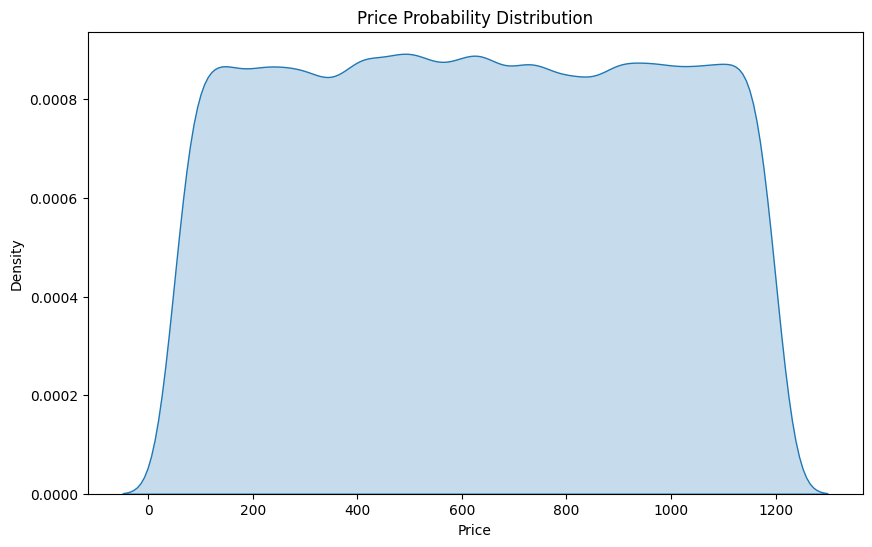

In [72]:
# Probability Distribution Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['price'], shade=True)
plt.title('Price Probability Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


## Conclusion

## 1.Bimodal Distribution:
The graph has two prominent peaks, suggesting that two different price levels occur frequently.
These peaks represent the most probable prices in your dataset.
## 2.Price Range:
The horizontal axis represents the price values.
The distribution covers a range of prices from 0 to around 1200.
## 3.Density:
The vertical axis represents the density (probability) of each price.
The areas under the curve at the peaks indicate the likelihood of those specific prices occurring.
## 4.Application:
This type of distribution is relevant for understanding pricing trends, market analysis, and decision-making.
It can be used in fields such as economics, finance, and sales forecasting.

## Conclusion
Based on the analysis, the following conclusions can be drawn:

## Distribution of Listings: 
The majority of listings are concentrated in certain neighborhoods and boroughs, with Manhattan and Brooklyn having the highest number of listings.
## Pricing Trends:
Listings in Manhattan tend to have higher prices compared to other boroughs. Room type also significantly affects pricing, with entire homes/apartments being more expensive than private or shared rooms.
## Review Patterns: 
Popular listings with higher review rates are typically found in prime locations. Listings with a higher number of reviews generally have consistent availability throughout the year.
## Availability: 
Availability varies across listings, with some properties being available for most of the year while others have limited availability due to high booking rates or host preferences.
## Final Results
The analysis provides actionable insights for various stakeholders:

## Hosts: 
Can optimize their pricing and availability strategies based on market trends.
## Guests: 
Can identify the best neighborhoods and properties that suit their budget and preferences.

## Researchers and Policymakers: 
Can utilize the data to understand the impact of short-term rentals on the housing market and neighborhood dynamics.